<a href="https://colab.research.google.com/github/cynthialmy/Sentiment-Analysis-with-Scikit-learn/blob/main/Complete_Sentiment_Analysis_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

## Sentiment Analysis

Sentiment analysis is a technique used in natural language processing (NLP) to identify and extract subjective information from text, such as opinions, attitudes, emotions, and feelings. 
## Yelp Review Data
Yelp is a platform where users can post reviews about businesses, products, and services. Therefore, analyzing Yelp data can provide valuable insights into customers' sentiments towards a particular business or product.



## Overview

1. Introduction to sentiment analysis
2. Data exploration and preprocessing of Yelp restaurant reviews
3. Utilizing NLTK for feature extraction
4. Training a machine learning model with scikit-learn to predict restaurant review stars
5. Out-of-the-box techniques:
  - VADER (Valence Aware Dictionary and sEntiment Reasoner) - Bag of words approach
  - Roberta Pretrained Model from HuggingFace🤗
  - HuggingFace Pipeline


Video about Sentiment Analysis: https://www.youtube.com/watch?v=i4D5DZ5ZG-0

In [ ]:
# imports all the necessary libraries and packages required for 
# performing sentiment analysis using machine learning techniques 
# and natural language processing. 
import pandas as pd # imports the pandas library, which provides data manipulation tools and data structures for Python.
import numpy as np # imports the NumPy library, which provides support for large, multi-dimensional arrays and matrices.
import matplotlib.pyplot as plt # imports the matplotlib library, which provides data visualization tools for Python.
import seaborn as sns # imports the seaborn library, which provides additional data visualization tools and styles for Python.
import string # imports a built-in module that provides a list of common punctuation characters.
import math # imports a built-in math library that provides mathematical functions and constants.
%matplotlib inline



## Sample of dataset

All data set can be accessed and downloaded from Yelp Open Data Set [https://www.yelp.com/dataset/download].

In [ ]:
# LOADING THE DATASET AND SEEING THE DETAILS
data = pd.read_csv('https://raw.githubusercontent.com/cynthialmy/DataVizLab/main/yelp_dataset/yelp.csv')

In [ ]:
# SHAPE OF THE DATASET
print("Shape of the dataset:")
# Your code here
data.shape

Shape of the dataset:


(10000, 10)

In [ ]:
# DATATYPE OF EACH COLUMN
data.dtypes

business_id    object
date           object
review_id      object
stars           int64
text           object
type           object
user_id        object
cool            int64
useful          int64
funny           int64
dtype: object

In [ ]:
# Take a look at the first few entries
data.head(3)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0


# Explore the Data - Visualization

Let's take a look at the distribution of the reviews in terms of stars

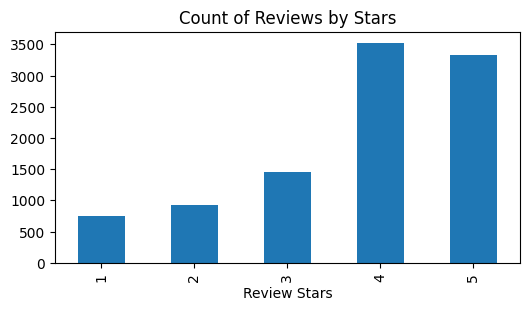

In [ ]:
ax = data['stars'].value_counts().sort_index().plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(6, 3))
ax.set_xlabel('Review Stars')
plt.show()

Classifying the dataset and splitting it into the reviews and stars:

In [ ]:
# Classification in terms of negative (1 star), neutral (3 star), positive (5 star)
# Your code here
data_classes = data[(data['stars']==1)|(data['stars']==3)|(data['stars']==5)]
data_classes.head()
print(data_classes.shape)

(5547, 11)


In [ ]:
data = data.head(3000)

In [ ]:
# Seperate the dataset into X and Y for prediction
# Your code here
x = data_classes['text']
y = data_classes['stars']
print(x.head())
print(y.head())

0    My wife took me here on my birthday for breakf...
1    I have no idea why some people give bad review...
3    Rosie, Dakota, and I LOVE Chaparral Dog Park!!...
4    General Manager Scott Petello is a good egg!!!...
6    Drop what you're doing and drive here. After I...
Name: text, dtype: object
0    5
1    5
3    5
4    5
6    5
Name: stars, dtype: int64


# Preprocessing Yelp Data

Yelp data comes in unstructured format, so the first step is to preprocess the data. This includes cleaning the text, removing stop words, and tokenizing the words.

## Vectorization
Vectorization is the process of converting raw text data into a numerical format that can be used as input for machine learning algorithms.

Vectorization involves three key steps:

1. Tokenization: The text is first split into individual words or tokens. This step is important to break down the text into smaller, manageable pieces.

2. Encoding: The tokens are then converted into numerical representations. There are different methods of encoding, but a common one is to represent each token as a unique integer. This is called integer encoding.

3. Vectorization: The integer encoded tokens are then transformed into a vector representation that can be used as input for machine learning algorithms. 

Countvectorizer is a method to convert text to numerical data. 
We will now vectorize a single review and see the results:

In [ ]:
# print out an example of the review
example = data['text'][50]
print(example)

Cliff notes
- Cheap: $1-2/plate
- Fast: It's ready-to-go and on a conveyor
- Acceptable quality: I'm here weekly and haven't gotten sick lol

This place is definitely good for what it is, "it" being a budget-friendly sushi place that's great for a quick bite.  In a response to the lower-rating reviews stating how the food is just okay at best or authentic or blah blah blah, well think of it like wal-mart vs. *inserthighendretailerhere*.  This place has a business model based on selling in large volumes (hence the low prices like wal-mart) so they're gonna have to "reduce costs" somehow (so-so quality food, not-so-attentive staff, and slightly smaller than average portions), but it's still a solid bang-for-your-buck kinda place.

On top of this, I can be in and out quickly since everything is already prepared, perfect for those quick 30 min lunch breaks.  All that's required is for you to grab it off the conveyor (depending on whether or not all the items you want are on the conveyor at

In [ ]:
# imports the CountVectorizer class from the scikit-learn library, which is used for text feature extraction.
from sklearn.feature_extraction.text import CountVectorizer 

# Initiate an instance of the CountVectorizer 
vectorizer = CountVectorizer()
# Apply the fit_transform() method of the CountVectorizer object to the example string
# The result is a sparse matrix X that represents 
#   the bag-of-words representation of the example string
X = vectorizer.fit_transform([example])
# Obtain the feature names of the CountVectorizer object
# The feature names correspond to the unique words in the example string
vectorizer.get_feature_names_out()

array(['30', 'about', 'acceptable', 'all', 'already', 'an', 'and',
       'answered', 'are', 'as', 'assist', 'at', 'attentive', 'authentic',
       'average', 'bang', 'based', 'be', 'beers', 'before', 'being',
       'best', 'bite', 'blah', 'bombs', 'breaks', 'buck', 'budget',
       'business', 'but', 'by', 'called', 'can', 'cheap', 'cherry',
       'claiming', 'cliff', 'code', 'color', 'contains', 'conveyor',
       'costs', 'counters', 'definitely', 'depending', 'descriptions',
       'diaf', 'do', 'due', 'during', 'even', 'everything', 'expect',
       'fast', 'fend', 'food', 'for', 'friendly', 'further',
       'furthermore', 'go', 'going', 'gonna', 'good', 'gotten', 'grab',
       'great', 'guide', 'had', 'hand', 'has', 'have', 'haven', 'hell',
       'help', 'hence', 'here', 'hold', 'hours', 'how', 'in',
       'inattentive', 'inform', 'inquiries', 'inserthighendretailerhere',
       'is', 'issues', 'it', 'items', 'japanese', 'just', 'kinda',
       'large', 'left', 'like', 'lol

In [ ]:
print(X.toarray())

[[ 1  1  1  2  1  1  8  1  1  1  1  2  1  1  1  1  2  3  1  1  1  1  1  3
   1  1  1  1  1  2  1  1  2  1  1  1  1  1  1  1  3  1  1  1  1  1  1  2
   1  1  1  1  1  1  1  2  8  1  1  1  3  1  1  1  1  1  1  1  1  1  1  1
   1  1  1  1  1  1  1  1  3  1  1  1  1  5  1  6  1  1  1  1  2  1  2  2
   1  1  1  1  1  2  1  1  1  1  1  1  3  1  6  1  1  9  3  1  1  1  2  1
   1  4  1  2  1  1  1  1  1  2  2  1  1  1  1  1  1  1  1  1  1  2  1  1
   1  1  1  1  1  1  1  1  4  1  1  1  2  1  1  4  1  1  4 13  1  1  1  1
   1  1  1  5  2  1 12  2  1  1  1  1  2  1  1  1  1  1  2  1  1  1  5  3]]


## Data Cleaning
We will now, define a function which will clean the dataset by removing stopwords and punctuations.

In [ ]:
# imports the Natural Language Toolkit (NLTK), a popular library for natural language processing in Python.
import nltk 
# imports a list of stop words from the NLTK corpus, which are common words that are often removed from text during text processing.
from nltk.corpus import stopwords 
# downloads the stop words list from the NLTK corpus.
nltk.download('stopwords') 
# downloads the words package from the NLTK corpus, which provides a list of English words.
nltk.download('words')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
# The code defines a function called text_process() that 
# performs text cleaning by removing stopwords and punctuation from a string
def text_process(text):
  # Create a list nopunc that contains all characters in the text string that are not in the string.punctuation set
  nopunc = [char for char in text if char not in string.punctuation]
  # Convert the `nopunc` list back into a string
  nopunc = ''.join(nopunc)
  # Split the `nopunc` string into a list of words
  # Create a new list that contains all words in 
  # the `nopunc` list that are not in the `stopwords.words('english')` set
  return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [ ]:
# CONVERTING THE WORDS INTO A VECTOR
# Your code here
vocab = CountVectorizer(analyzer=text_process).fit(x)
print('length of the vocab is', len(vocab.vocabulary_))

length of the vocab is 31336


In [ ]:
# The data that we can see is the transformed words.
# If we now get the feature's name - we can get the word back
print(vocab.get_feature_names_out()[1000:1100])

['Adult' 'Adults' 'Advisor' 'Advocate' 'Aegean' 'Aerobics' 'Aesthetically'
 'Affordable' 'Africa' 'Afterall' 'Afterdark' 'Afterward' 'Afterwards'
 'Agaves' 'Aged' 'Agent' 'Aggressive' 'Agree' 'Agua' 'Aguila' 'Agwa' 'Ah'
 'Ahab' 'Ahh' 'Ahha' 'Ahhh' 'Ahhhhh' 'Ahhhhhh' 'Ahi' 'Ahmazing'
 'Ahwahtukee' 'Ahwatukee' 'Ai' 'Aid' 'Aiellos' 'Aiko' 'Air' 'Airlines'
 'Airpark' 'Airport' 'Airwarys' 'Airways' 'Airwaysnever' 'Aisha' 'Aji'
 'Ajo' 'Akor' 'Al' 'Alabama' 'Aladdins' 'Alain' 'Alameda' 'Alan' 'Alas'
 'AlasIve' 'Alaska' 'Alaskan' 'Alaus' 'Albacore' 'Albeit' 'Alber'
 'Albertos' 'Albertsons' 'Alcatraz' 'Alcohol' 'Ale' 'Alemmmm' 'Alessias'
 'Alex' 'Alexa' 'Alexs' 'Alfalfa' 'Alfonso' 'Alfred' 'Alfredo' 'Ali'
 'Alice' 'Alicia' 'Alison' 'AllAmerican' 'AllStar' 'Allah' 'Allegiant'
 'Allen' 'Allende' 'Allergic' 'Allesias' 'Allison' 'Allow' 'Allstars'
 'Almond' 'Almost' 'Aloe' 'Aloft' 'Aloha' 'Along' 'Alongside' 'Alp'
 'Alphagraphics' 'Alpine']


Vectorization of the whole review set and and checking the sparse matrix:

In [ ]:
# Your code here
x = vocab.transform(x)

#Shape of the matrix:
print("Shape of the sparse matrix: ", x.shape)
#Non-zero occurences:
print("Non-Zero occurences: ",x.nnz)

# DENSITY OF THE MATRIX
density = (x.nnz/(x.shape[0]*x.shape[1]))*100
print("Density of the matrix = ",density)

Shape of the sparse matrix:  (5547, 31336)
Non-Zero occurences:  312457
Density of the matrix =  0.17975812697942373


In the above code block, 'vocab' is a CountVectorizer object that has already been fitted to some training data. The transform() method of the CountVectorizer object is being used to transform a new set of input data x into a sparse matrix representation.

A sparse matrix is a matrix where most of the elements are zero, and only a small number of elements are non-zero. In the context of NLP, a sparse matrix is used to represent a collection of text documents where each row corresponds to a document, and each column corresponds to a unique word in the vocabulary.


# Building a Sentiment Classifier -Machine Learning Approaches

One important benefit of vectorization is that it allows for the application of machine learning algorithms to NLP tasks. For example, once text has been vectorized, it can be used as input for classification models such as logistic regression, decision trees, or neural networks, allowing the machine learning model to learn patterns in the text and make predictions based on those patterns.

In this step, you will train a machine learning model to classify Yelp reviews into positive, negative, or neutral sentiments. You can use a variety of models.

In [ ]:
# imports functions for splitting data into training and testing sets, and for cross-validation.
from sklearn.model_selection import train_test_split, cross_val_score
# imports the classification_report function from scikit-learn, which generates a report of precision, recall, F1 score, and support for each class.
from sklearn.metrics import classification_report
# imports functions for evaluating classification models, including confusion matrix, accuracy score, ROC AUC score, and ROC curve.
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
# imports GridSearchCV class from scikit-learn for hyperparameter tuning.
from sklearn.model_selection import GridSearchCV
# sets the matplotlib backend to inline for displaying plots in the Jupyter notebook.

Splitting the dataset X into training and testing set:

In [ ]:
# SPLITTING THE DATASET INTO TRAINING SET AND TESTING SET
# Your code here
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

## Machine Learning Models

We will now use multiple Machine Algorithms to see which gives the best performance.
To learn more about the models: https://towardsdatascience.com/all-machine-learning-models-explained-in-6-minutes-9fe30ff6776a

Training a machine learning model with scikit-learn is a great option when we have a well-defined set of labeled data and want to train a model to make predictions on new, unseen data. This approach requires careful feature engineering and tuning of the model's hyperparameters.

1. Multinomial Naive Bayes (MNB): A simple probabilistic model that is often used for text classification tasks. MNB assumes that the features (words) are conditionally independent given the class label, and it estimates the probability of each class given a set of features using Bayes' rule. It works well for text classification tasks where the features are categorical (e.g., word counts).

In [ ]:
# Multinomial Naive Bayes

# Import the MultinomialNB class from the sklearn.naive_bayes module
from sklearn.naive_bayes import MultinomialNB

# Create an instance of the MultinomialNB class
mnb = MultinomialNB()

# Train the Multinomial Naive Bayes classifier on the training set (x_train, y_train)
mnb.fit(x_train,y_train)

# Use the trained classifier to predict the sentiment of the test set (x_test)
predmnb = mnb.predict(x_test)

# Compute the accuracy score of the Multinomial Naive Bayes classifier
# Round the score to 2 decimal places and store it in a variable called score_mnb
score_mnb = round(accuracy_score(y_test,predmnb)*100,2)

# Print the confusion matrix of the Multinomial Naive Bayes classifier
print("Confusion Matrix for Multinomial Naive Bayes:")
print(confusion_matrix(y_test,predmnb))

# Print the accuracy score of the Multinomial Naive Bayes classifier
print("Score:",score_mnb)

# Print the classification report of the Multinomial Naive Bayes classifier
print("Classification Report:")
print(classification_report(y_test,predmnb))

Confusion Matrix for Multinomial Naive Bayes:
[[ 75  49  38]
 [  7 180 105]
 [ 12  45 599]]
Score: 76.94
Classification Report:
              precision    recall  f1-score   support

           1       0.80      0.46      0.59       162
           3       0.66      0.62      0.64       292
           5       0.81      0.91      0.86       656

    accuracy                           0.77      1110
   macro avg       0.75      0.66      0.69      1110
weighted avg       0.77      0.77      0.76      1110



2. Random Forest Classifier (RFC): A popular ensemble method that combines multiple decision trees to improve performance and reduce overfitting. RFC works by building a set of decision trees on different subsets of the training data, using random feature subsets and bootstrap sampling. During prediction, the model aggregates the predictions of each decision tree to obtain a final prediction.

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Your code here
rmfr = RandomForestClassifier()
rmfr.fit(x_train,y_train)
predrmfr = rmfr.predict(x_test)
score_rmfr = round(accuracy_score(y_test,predrmfr)*100,2)

print("Confusion Matrix for Random Forest Classifier:")
print(confusion_matrix(y_test,predrmfr))
print("Score:",score_rmfr)
print("Classification Report:")
print(classification_report(y_test,predrmfr))

Confusion Matrix for Random Forest Classifier:
[[ 27  26 109]
 [  2 103 187]
 [  1  13 642]]
Score: 69.55
Classification Report:
              precision    recall  f1-score   support

           1       0.90      0.17      0.28       162
           3       0.73      0.35      0.47       292
           5       0.68      0.98      0.81       656

    accuracy                           0.70      1110
   macro avg       0.77      0.50      0.52      1110
weighted avg       0.73      0.70      0.64      1110



3. Decision Tree (DT): A simple model that uses a tree-like structure to make decisions based on a set of input features. DT works by recursively splitting the input data into smaller subsets based on the most informative features, until a stopping criterion is reached. DT can be prone to overfitting on noisy data, but can be effective for simple classification tasks with few features.

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
score_dt = round(accuracy_score(y_test,preddt)*100,2)

print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test,preddt))
print("Score:",score_dt)
print("Classification Report:")
print(classification_report(y_test,preddt))

Confusion Matrix for Decision Tree:
[[ 63  44  55]
 [ 35 138 119]
 [ 40 101 515]]
Score: 64.5
Classification Report:
              precision    recall  f1-score   support

           1       0.46      0.39      0.42       162
           3       0.49      0.47      0.48       292
           5       0.75      0.79      0.77       656

    accuracy                           0.65      1110
   macro avg       0.56      0.55      0.56      1110
weighted avg       0.64      0.65      0.64      1110



4. Support Vector Machines (SVM): A powerful model that works by finding the hyperplane that maximally separates the training data into different classes. SVM can be used for both linear and nonlinear classification tasks, and can be effective for high-dimensional datasets with complex decision boundaries.

In [ ]:
# Support Vector Machine
from sklearn.svm import SVC

# Your code here
svm = SVC(random_state=101)
svm.fit(x_train,y_train)
predsvm = svm.predict(x_test)
score_svm = round(accuracy_score(y_test,predsvm)*100,2)

print("Confusion Matrix for Support Vector Machines:")
print(confusion_matrix(y_test,predsvm))
print("Score:",score_svm)
print("Classification Report:")
print(classification_report(y_test,predsvm))

Confusion Matrix for Support Vector Machines:
[[ 31  23 108]
 [  5 122 165]
 [  1  19 636]]
Score: 71.08
Classification Report:
              precision    recall  f1-score   support

           1       0.84      0.19      0.31       162
           3       0.74      0.42      0.54       292
           5       0.70      0.97      0.81       656

    accuracy                           0.71      1110
   macro avg       0.76      0.53      0.55      1110
weighted avg       0.73      0.71      0.67      1110



5. K-Nearest Neighbor Classifier (KNN): A simple non-parametric model that works by finding the k-nearest neighbors of a new data point in the training set, and assigning the most common class label among its neighbors as the predicted label. KNN can be effective for small datasets with simple decision boundaries, but can be sensitive to the choice of k and the distance metric used.

In [ ]:
# K Nearest Neighbour Algorithm
from sklearn.neighbors import KNeighborsClassifier

# Your code here
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
score_knn = round(accuracy_score(y_test,predknn)*100,2)

print("Confusion Matrix for K Neighbors Classifier:")
print(confusion_matrix(y_test,predknn))
print("Score: ",score_knn)
print("Classification Report:")
print(classification_report(y_test,predknn))

Confusion Matrix for K Neighbors Classifier:
[[ 12  10 140]
 [  3  33 256]
 [  8  12 636]]
Score:  61.35
Classification Report:
              precision    recall  f1-score   support

           1       0.52      0.07      0.13       162
           3       0.60      0.11      0.19       292
           5       0.62      0.97      0.75       656

    accuracy                           0.61      1110
   macro avg       0.58      0.39      0.36      1110
weighted avg       0.60      0.61      0.51      1110



From the above algorithm modelling, we can list the accuracy for each model:

In [ ]:
print('Multinomial Naive Bayes = ',score_mnb,'%') 
print('Support Vector Machine = ',score_svm,'%') 
print('Random Forest Classifier = ',score_rmfr,'%') 
print('Decision Tree = ',score_dt,'%') 
print('K Neighbor Classifier = ',score_knn,'%') 

Multinomial Naive Bayes =  76.94 %
Support Vector Machine =  71.08 %
Random Forest Classifier =  69.55 %
Decision Tree =  64.5 %
K Neighbor Classifier =  61.35 %


In summary, MNB, RFC, DT, SVM, and KNN are all popular models for classification tasks. MNB is simple and efficient, RFC and DT are effective at handling noisy data, SVM is powerful and effective for high-dimensional data, and KNN is simple and effective for small datasets. The choice of model depends on the specific task at hand, the size and complexity of the data, and the desired trade-off between accuracy and computational efficiency.

Since Multinomial Naive Bayes has the best score, let us use it to predict a random positive review, a random average review and a random negative review!

In [ ]:
# POSITIVE REVIEW
pr = data['text'][0]
print(pr)
print("Actual Rating:")
print(data['stars'][0])
pr_t = vocab.transform([pr])
print("Predicted Rating:")
mnb.predict(pr_t)[0]

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!
Actual Rating:
5
Predicted Rating:


5

In [ ]:
# AVERAGE REVIEW
ar = data['text'][16]
print(ar)
print("Actual Rating:")
print(data['stars'][16])
# Your code here
ar_t = vocab.transform([ar])
print("Predicted Rating:")
# Your code here
mnb.predict(ar_t)[0]

We went here on a Saturday afternoon and this place was incredibly empty.  They had brunch specials going on, including $2 bloody mary's and mimosas, but we were more in the mood for lunch.  Except for the bloody mary, I had to try one.  It came out in a high-ball-sized glass.  Boo!  But it was really tasty. Yay!  The hubby remembered a sign outside the restaurant a few weeks back that said they had Arrogant Bastard, and he got a 22 oz bottle for $4.75.  Hey, that's not fair!!

Next up: the wings.  We were a bit hesitant to order them when the waitress informed us that they are "seasoned" but not sauced, so they can't be ordered hot.  We did ask for them crispy though, and the waitress even asked the cooks to throw them back in for a few minutes when they came out not visibly crispy.  These non-traditional wings were actually pretty damn good.  The seasoning was a little spicy and salty with just a hint of sweet.  If I were in the mood for the tang and kick of Frank's Hot Sauce, these 

3

In [ ]:
# NEGATIVE REVIEW
nr = data['text'][23]
print(nr)
print("Actual Rating:")
print(data['stars'][23])
# Your code here
nr_t = vocab.transform([nr])
print("Predicted Rating:")
# Your code here
mnb.predict(nr_t)[0]

U can go there n check the car out. If u wanna buy 1 there? That's wrong move! If u even want a car service from there? U made a biggest mistake of ur life!! I had 1 time asked my girlfriend to take my car there for an oil service, guess what? They ripped my girlfriend off by lying how bad my car is now. If without fixing the problem. Might bring some serious accident. Then she did what they said. 4 brand new tires, timing belt, 4 new brake pads. U know why's the worst? All of those above I had just changed 2 months before!!! What a trashy dealer is that? People, better off go somewhere!
Actual Rating:
1
Predicted Rating:


1

## Bias in dataset

In [ ]:
count = data['stars'].value_counts()
print(count)

4    1061
5    1006
3     424
2     277
1     232
Name: stars, dtype: int64




It is probable that the dataset contains a higher proportion of positive reviews in comparison to negative reviews. To address this issue, normalization of the dataset by equalizing the number of reviews could be a potential solution to mitigate bias.

# Out-of-the-box Tools:

When it comes to sentiment analysis, there are various approaches that we can take. In our workshop, we covered the traditional machine learning approaches. Now we will take a look at the newer, out-of-the-box techniques.

1. VADER (Valence Aware Dictionary and sEntiment Reasoner) - Bag of words approach
2. Roberta Pretrained Model from 🤗
3. Huggingface Pipeline

In [ ]:
# downloads the vader_lexicon package from the NLTK corpus, which provides a sentiment lexicon for sentiment analysis.
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

# Step 1. VADER Scoring 

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based approach that utilizes a pre-defined dictionary of words to determine the sentiment of a text. 

This approach is useful when we don't have labeled data or when we want to quickly analyze the sentiment of a large volume of text.

We will use NLTK's `SentimentIntensityAnalyzer` to get the neg/neu/pos scores of the text.

- This uses a "bag of words" approach:
    1. Stop words are removed
    2. each word is scored and combined to a total score.

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

# Your code here
sia = SentimentIntensityAnalyzer()

In [ ]:
# something positive
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [ ]:
# something negative
# Your code here
sia.polarity_scores('It\'s not worth your buck. Go somewhere else!')

{'neg': 0.219, 'neu': 0.781, 'pos': 0.0, 'compound': -0.2401}

In [ ]:
print(example)

Cliff notes
- Cheap: $1-2/plate
- Fast: It's ready-to-go and on a conveyor
- Acceptable quality: I'm here weekly and haven't gotten sick lol

This place is definitely good for what it is, "it" being a budget-friendly sushi place that's great for a quick bite.  In a response to the lower-rating reviews stating how the food is just okay at best or authentic or blah blah blah, well think of it like wal-mart vs. *inserthighendretailerhere*.  This place has a business model based on selling in large volumes (hence the low prices like wal-mart) so they're gonna have to "reduce costs" somehow (so-so quality food, not-so-attentive staff, and slightly smaller than average portions), but it's still a solid bang-for-your-buck kinda place.

On top of this, I can be in and out quickly since everything is already prepared, perfect for those quick 30 min lunch breaks.  All that's required is for you to grab it off the conveyor (depending on whether or not all the items you want are on the conveyor at

In [ ]:
# example
# Your code here
sia.polarity_scores(example)

{'neg': 0.056, 'neu': 0.77, 'pos': 0.173, 'compound': 0.9889}

In [ ]:
data = data.head(300)

In [ ]:
# The code is computing the sentiment scores for the entire dataset

# An empty dictionary res is created to store the analysis results for each business ID
res = {}

# Your code here
# The for loop iterates over each row in the data DataFrame using the iterrows() method
# The i variable is the current index of the iteration, 
#   and row is the current row of the DataFrame
# The total argument of tqdm is set to the length of 
#   the data DataFrame to display a progress bar
for i, row in tqdm(data.iterrows(), total=len(data)):
  # Extract the text and business ID from the current row of the DataFrame
    text = row['text']
    myid = row['business_id']
    # Apply the VADER sentiment analyzer to the text and 
    #   obtain the resulting sentiment scores as a dictionary
    # Add the resulting dictionary to the `res` dictionary, 
    #   using the business ID as the key
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/300 [00:00<?, ?it/s]

In [ ]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'business_id'})
vaders = vaders.merge(data, how='left')

In [ ]:
# Now we have sentiment score and metadata
vaders.head(3)

,business_id,neg,neu,pos,compound,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,0.015,0.687,0.298,0.9950,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,0.049,0.741,0.210,0.9943,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,0.000,0.523,0.477,0.8988,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76


In [ ]:
vaders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   business_id  300 non-null    object 
 1   neg          300 non-null    float64
 2   neu          300 non-null    float64
 3   pos          300 non-null    float64
 4   compound     300 non-null    float64
 5   date         300 non-null    object 
 6   review_id    300 non-null    object 
 7   stars        300 non-null    int64  
 8   text         300 non-null    object 
 9   type         300 non-null    object 
 10  user_id      300 non-null    object 
 11  cool         300 non-null    int64  
 12  useful       300 non-null    int64  
 13  funny        300 non-null    int64  
 14  length       300 non-null    int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 37.5+ KB


## Plot VADER results

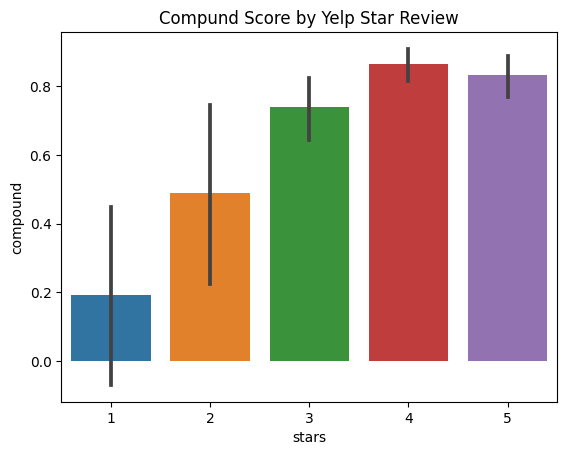

In [ ]:
import seaborn as sns
ax = sns.barplot(data=vaders, x='stars', y='compound')
ax.set_title('Compund Score by Yelp Star Review')
plt.show()

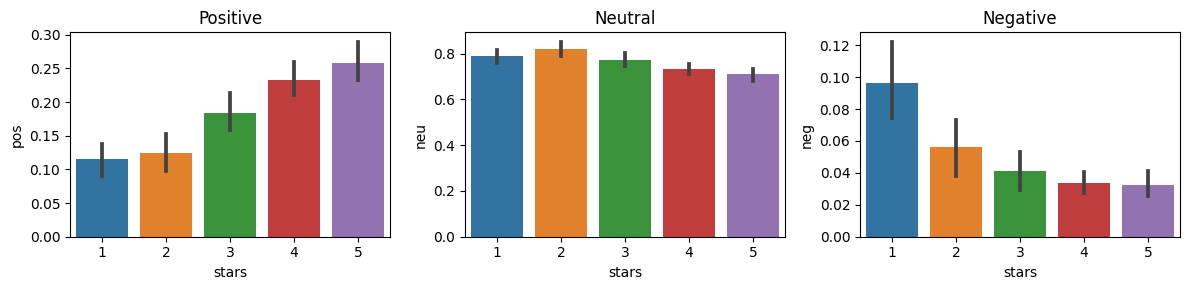

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='stars', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='stars', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='stars', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

# Step 3. Roberta Pretrained Model - self-supervised learning approach

The Roberta Pretrained Model from HuggingFace🤗 is a deep learning-based approach that utilizes a pre-trained language model to extract features and predict sentiment. 

This approach is useful when we have a large volume of data and want to leverage pre-trained models to avoid the need for extensive feature engineering.

- Use a model trained of a large corpus of data.
- Transformer model accounts for the words but also the context related to other words.

In [ ]:
# installs the transformers package for working with pre-trained models for natural language processing.
!pip install transformers
# imports the AutoTokenizer class from the transformers library, which is used for tokenizing text input.
from transformers import AutoTokenizer
# imports the AutoModelForSequenceClassification class from the transformers library, 
# which is used for performing sequence classification tasks such as sentiment analysis.
from transformers import AutoModelForSequenceClassification
# imports the softmax function from the scipy library, which is used for calculating probabilities in classification models.
from scipy.special import softmax
# sets the pre-trained sentiment analysis model to be used to the Cardiff University's RoBERTa model.
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
# initializes the tokenizer with the pre-trained model
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 51.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 KB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 53.2 MB/s eta 0:00:00


Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# Run for Roberta Model
# The code uses a pre-trained RoBERTa model and tokenizer 
# to classify the sentiment of a given input text

# Tokenize the input text using the pre-trained tokenizer object
# The return_tensors argument specifies that the tokenized text 
# should be returned in PyTorch tensor format.
encoded_text = tokenizer(example, return_tensors='pt')

# Pass the encoded text as input to the pre-trained RoBERTa model and obtain its output
# The ** syntax is used to unpack the tensor as named arguments for the model
output = model(**encoded_text) 

# Extract the predicted class scores from the model output tensor 
# and convert them to a numpy array
scores = output[0][0].detach().numpy()
# Apply the softmax function to convert the class scores into probabilities that sum to 1
scores = softmax(scores)
# Create a dictionary that maps the class names to their corresponding probabilities
# The keys are roberta_neg for the negative class, 
# roberta_neu for the neutral class, and roberta_pos for the positive class
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
# Print the dictionary of class probabilities to the console
print(scores_dict)

{'roberta_neg': 0.024074968, 'roberta_neu': 0.30235383, 'roberta_pos': 0.6735712}


In [ ]:
# This is a Python function called polarity_scores_roberta that takes
# a string of text as input and returns a dictionary of sentiment scores for that text

def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [ ]:
# The code iterates over a pandas DataFrame called data, 
# which is assumed to have columns for text and business IDs

# An empty dictionary res is created to store 
# the sentiment analysis results for each business ID
res = {}
# Your code here

# The for loop iterates over each row in the data DataFrame using the iterrows() method
# The i variable is the current index of the iteration, 
# and row is the current row of the DataFrame
# The total argument of tqdm is set to the length of 
# the data DataFrame to display a progress bar
for i, row in tqdm(data.iterrows(), total=len(data)):
    try:
      # Extract the text and business ID from the current row of the DataFrame
        text = row['text']
        myid = row['business_id']

        # Apply the VADER sentiment analyzer to the text and 
        # obtain the resulting sentiment scores as a dictionary
        vader_result = sia.polarity_scores(text)

        # Rename the keys of the VADER sentiment score dictionary to start with "vader_"
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value

        # Apply the pre-trained RoBERTa model to the text and 
        # obtain the resulting sentiment scores as a dictionary
        roberta_result = polarity_scores_roberta(text)

        # Combine the VADER and RoBERTa sentiment score dictionaries into a single dictionary
        both = {**vader_result_rename, **roberta_result}

        # Add the resulting dictionary to the `res` dictionary, 
        # using the business ID as the key
        res[myid] = both
    
    # If a `RuntimeError` occurs during the sentiment analysis, 
    # print a warning message indicating the business ID that caused the error
    except RuntimeError:
        print(f'Broke for id {myid}')


  0%|          | 0/300 [00:00<?, ?it/s]

Broke for id 7SO_rX1F6rQEl-5s3wZxgQ
Broke for id FCcFT610nQBVcRdY-devQA
Broke for id d7_jkx0VPx3uHsUl18iHMQ
Broke for id LzpR_jE6VIutJ08s2cdRrw
Broke for id 1621ir5mjVgbHwxCbMAEjg
Broke for id l3yL2rQ6PoFBQ06RLczn9w


In [ ]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'business_id'})
results_df = results_df.merge(data, how='left')

# Step 3. Compare Scores between models

In [ ]:
# take a look at the column of the df
results_df.columns

Index(['business_id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'date', 'review_id',
       'stars', 'text', 'type', 'user_id', 'cool', 'useful', 'funny',
       'length'],
      dtype='object')

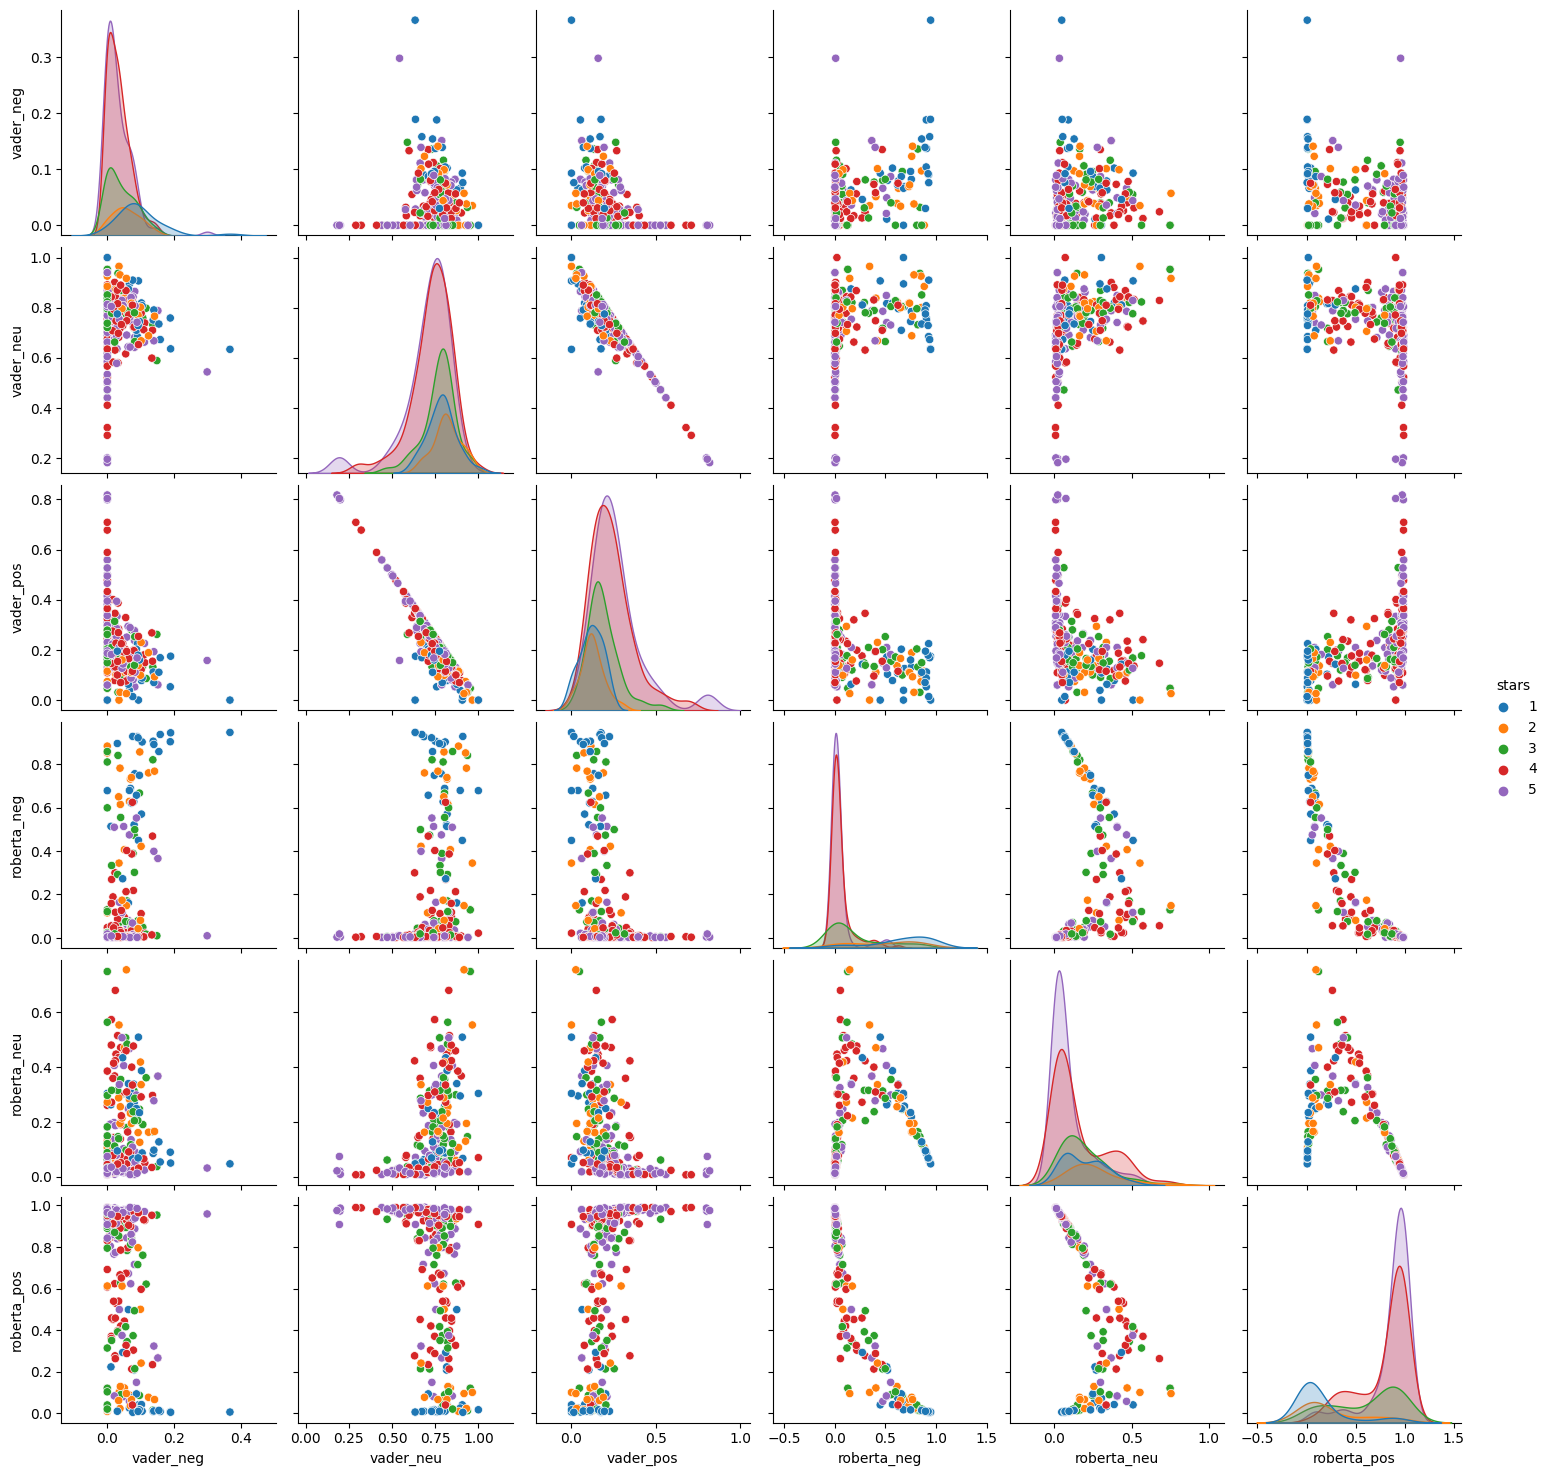

In [ ]:
# The pair plot is a matrix of scatter plots and histograms, where each variable 
# in the DataFrame is plotted against every other variable. 
# The purpose of the plot is to visualize the relationship 
# between different sentiment scores generated by Vader and RoBERTa models.
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='stars',
            palette='tab10')
plt.show()

In the pairplot, the **diagonal** part of the plot shows the **distribution** of a single variable. 

If the **distribution** of sentiment scores is **centered** around a particular value (e.g. 0 for neutral sentiment), this may indicate that the model is not performing well and is assigning a large proportion of reviews to this particular sentiment category. 

On the other hand, if the **distribution** of sentiment scores is **spread out** and not centered around a particular value, this may indicate that the model is performing well and capturing a range of sentiment expressions.

We can use the diagonal plots to compare the distribution of sentiment scores generated by Vader and RoBERTa. And we can see the the distribution of the RoBERTa is a lot more spread out hence it performs better.

# Step 4: Review Examples

## Positive sentiment 1-Star Reviews

Lets look at some examples where the model scoring and review score differ the most.

In [ ]:
# retrieves the text of the row with the highest positive sentiment score 
# using the Vader model among the rows that have a star rating of 1.
# Your code here
results_df.query('stars == 1') \
    .sort_values('vader_pos', ascending=False)['text'].values[0]

# sia.polarity_scores()

'really, I can\'t believe this place has received such high reviews from people.\n\nmy lady and i walked in, and were greeted rather rudely by a pretentious bitch at the front with a monotone "name please?", instead of a warm, friendly, french welcome to this rather charming looking place. we didn\'t have a reservation, which from the looks of how dead empty the place was, didn\'t seem like a problem. until the hostess whisked through her reservation list and explained she\'d try to "fit us in". it was 6pm, the place had one other couple dining, and we were informed that the next party was arriving at 7:30. we weren\'t really looking to hang out. it would have be awfully lovely if yelpers would have informed of the need to MAKE RESERVATIONS before going in here, because if you don\'t, you\'re automatically a piece of shit according to the staff. sorry, i don\'t plan very much ahead. next time i will, and it won\'t be here.\n\nanyways, after debating for a minute or two with herself, th

In [ ]:
# retrieves the text of the row with the highest positive sentiment score 
# using the RoBERTa model among the rows that have a star rating of 1.
results_df.query('stars == 1') \
    .sort_values('roberta_pos', ascending=False)['text'].values[0]

# polarity_scores_roberta()

'really, I can\'t believe this place has received such high reviews from people.\n\nmy lady and i walked in, and were greeted rather rudely by a pretentious bitch at the front with a monotone "name please?", instead of a warm, friendly, french welcome to this rather charming looking place. we didn\'t have a reservation, which from the looks of how dead empty the place was, didn\'t seem like a problem. until the hostess whisked through her reservation list and explained she\'d try to "fit us in". it was 6pm, the place had one other couple dining, and we were informed that the next party was arriving at 7:30. we weren\'t really looking to hang out. it would have be awfully lovely if yelpers would have informed of the need to MAKE RESERVATIONS before going in here, because if you don\'t, you\'re automatically a piece of shit according to the staff. sorry, i don\'t plan very much ahead. next time i will, and it won\'t be here.\n\nanyways, after debating for a minute or two with herself, th

## Negative sentiment 5-Star Reviews

In [ ]:
# retrieves the text of the row with the highest negative sentiment score 
# using the Vader model among the rows that have a star rating of 5.
# Your code here
results_df.query('stars == 5') \
    .sort_values('vader_neg', ascending=False)['text'].values[0]

# sia.polarity_scores()

"Who dosen't like Cosco, I love this place. The pizza is cheap and good."

In [ ]:
# retrieves the text of the row with the highest negative sentiment score 
# using the RoBERTa model among the rows that have a star rating of 5.
results_df.query('stars == 5') \
    .sort_values('roberta_neg', ascending=False)['text'].values[0]

# polarity_scores_roberta() 

"Being Indian, and having grown up in London, I have been pretty spoilt for Indian food. Imagine my dismay when I moved to Phoenix! I've tried many different places here in town desperately trying to recapture the memory of a good London curry house but each time I've left either disappointed or clutching my guts fearing what may come.\n\nCouple of friends introduced me to this place a few months ago and I'm stoked. It's not as good as the stuff back home. And I'm sure you can get better in San Francisco or New York. But if you are looking for something closer to home you can't go wrong.\n\nPlus its got the real live Indians eating in there too. Can't be bad!!"

# The Transformers Pipeline

Finally, the HuggingFace Pipeline is a high-level API that allows us to easily utilize pre-trained models for various natural language processing tasks, including sentiment analysis. 

This approach is useful when we want to quickly and easily analyze the sentiment of text data without the need for extensive coding or model training.

In [ ]:
from transformers import pipeline
# creates a sentiment analysis pipeline using the Hugging Face Transformers library. 
# The pipeline() function is used to create a pre-trained sentiment analysis model 
# that can be used to classify the sentiment of input text.
sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
# something positive
# Your code here
sent_pipeline("this workship is awesome!")

[{'label': 'POSITIVE', 'score': 0.9998811483383179}]

In [ ]:
# something negative
# Your code here
sent_pipeline("this is not worth my time")

[{'label': 'NEGATIVE', 'score': 0.9998040795326233}]

It's important to note, however, that out-of-the-box techniques may not always be the best option for our specific task. For example, if we have a small, highly specialized dataset, training a custom machine learning model may be more effective than using a pre-trained model or lexicon-based approach. 

Additionally, out-of-the-box techniques may not always perform well on data that differs significantly from the data they were trained on.

Ultimately, the choice of which approach to use depends on the specific task at hand, the amount and type of data available, and the resources available for training and implementation.

# The End